In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

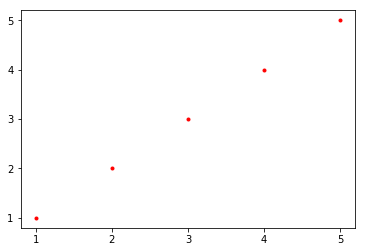

In [31]:
plt.yticks([1, 2, 3, 4, 5, 6])
plt.xticks([1, 2, 3, 4, 5])
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], 'r.');
plt.savefig('obviousfit.png')

In [21]:
sample_x = [[1.5], [2], [2.5], [3], [3.5], [4], [4.5], [5]]
sample_y = [.9, 3, 2.5, 3.1, 6.7, 6.1, 8.1, 8.25]

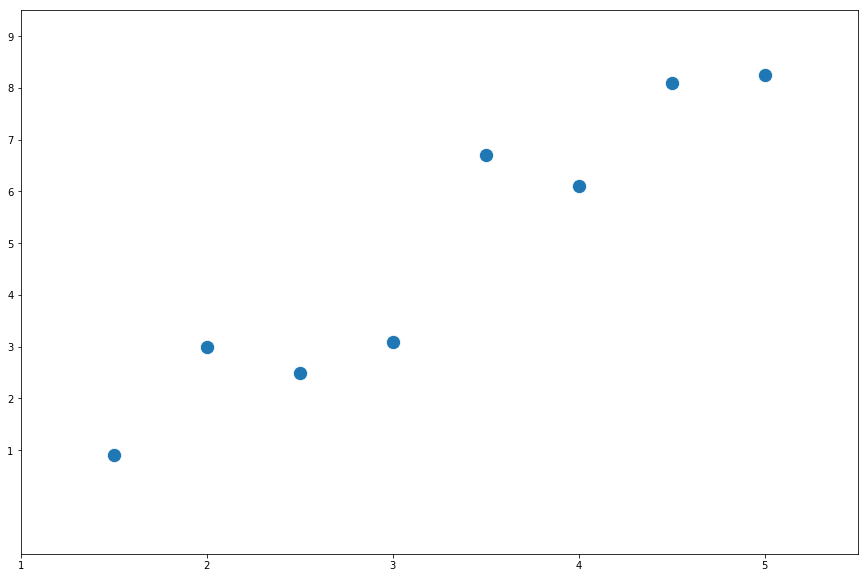

In [110]:
plt.figure(figsize=(15,10))
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xticks([1, 2, 3, 4, 5, 6, 7])
sns.scatterplot([1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], [.9, 3, 2.5, 3.1, 6.7, 6.1, 8.1, 8.25], ci=None, s=200

);
plt.xlim(1, 5.5)
plt.ylim(-1,9.5)
plt.savefig('howtofit.png')

In [83]:
bad_coef = 3
bad_intercept = -5.5

def bad_model(xs):
    bad = []
    for x in xs:
        bad.append(x*bad_coef + bad_intercept)
    return bad

In [99]:
bad_pred = bad_model([1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])

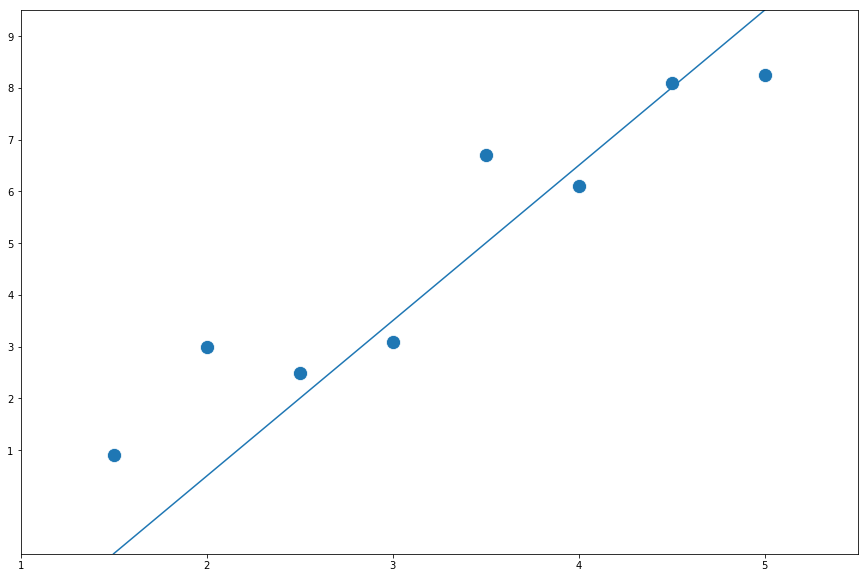

In [111]:
plt.figure(figsize=(15,10))
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xticks([1, 2, 3, 4, 5, 6, 7])
sns.scatterplot([1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], [.9, 3, 2.5, 3.1, 6.7, 6.1, 8.1, 8.25], ci=None, s=200);
sns.lineplot([1.5, 5], [-1.0, 9.5])
plt.xlim(1, 5.5)
plt.ylim(-1,9.5)
plt.savefig('howtofitbadly.png')

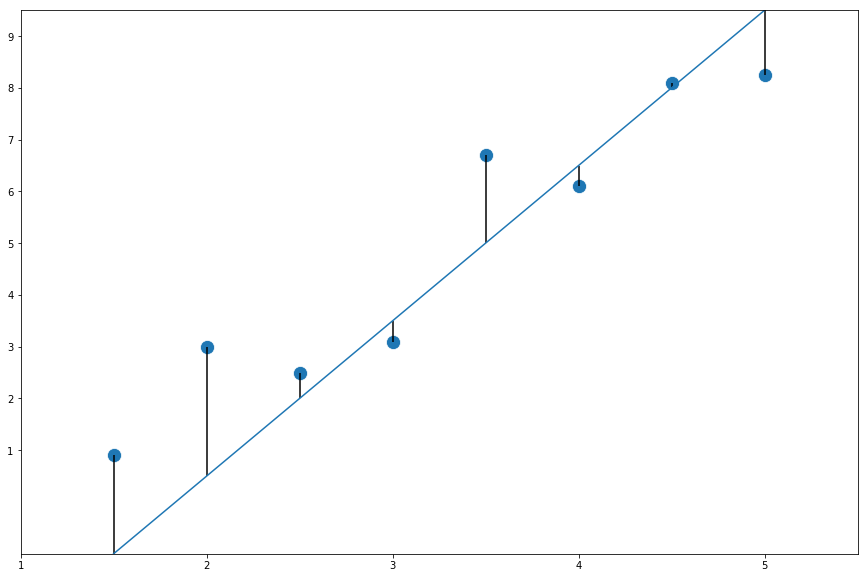

In [112]:
plt.figure(figsize=(15,10))
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xticks([1, 2, 3, 4, 5, 6, 7])
sns.scatterplot([1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], [.9, 3, 2.5, 3.1, 6.7, 6.1, 8.1, 8.25], ci=None, s=200);
sns.lineplot([1.5, 5], [-1.0, 9.5])
for i, x in enumerate(sample_x):
    plt.vlines(x, sample_y[i], bad_pred[i])
plt.xlim(1, 5.5)
plt.ylim(-1,9.5)
plt.savefig('howtofitbadlyrss.png')

In [105]:
model = LinearRegression()
model.fit(sample_x, sample_y)
pred = model.predict(sample_x)

In [64]:
print(model.coef_, model.intercept_)

[2.175] -2.237499999999999


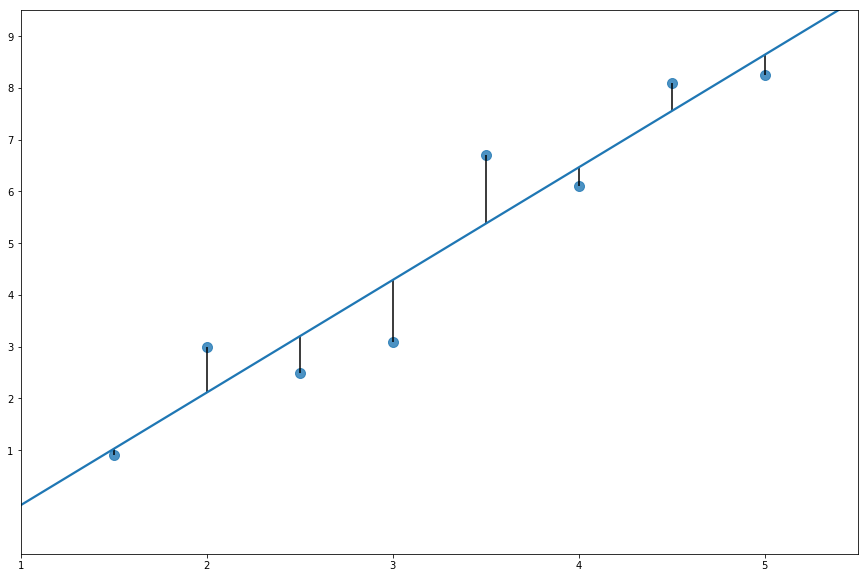

In [118]:
plt.figure(figsize=(15,10))
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xticks([1, 2, 3, 4, 5, 6, 7])
plt.xlim(1, 5.5)
plt.ylim(-1,9.5)
sns.regplot([1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], [.9, 3, 2.5, 3.1, 6.7, 6.1, 8.1, 8.25], 'r.', ci=None, scatter_kws={"s": 100}

);
for i, x in enumerate(sample_x):
    plt.vlines(x, sample_y[i], pred[i])
 
plt.savefig('howtofitrss.png')

[1.5] 0.9 1.0250000000000008
[2] 3 2.1125000000000007
[2.5] 2.5 3.200000000000001
[3] 3.1 4.2875000000000005
[3.5] 6.7 5.375
[4] 6.1 6.4625
[4.5] 8.1 7.550000000000001
[5] 8.25 8.637500000000001


(0, 10)

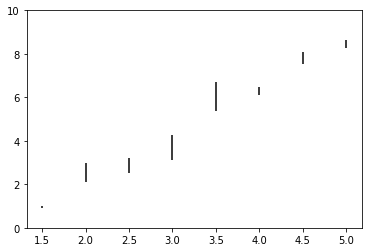

In [39]:
for i, x in enumerate(sample_x):
    print(x, sample_y[i], pred[i])
    diff = sample_y[i] - pred[i]
    plt.vlines(x[0], sample_y[i], pred[i])
plt.ylim(0, 10)


In [23]:
model = LinearRegression()
model.fit(sample_x, sample_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print(model.coef_, model.intercept_)

[2.175] -2.237499999999999


In [28]:
pred = model.predict(sample_x)

In [29]:
pred

array([1.025 , 2.1125, 3.2   , 4.2875, 5.375 , 6.4625, 7.55  , 8.6375])

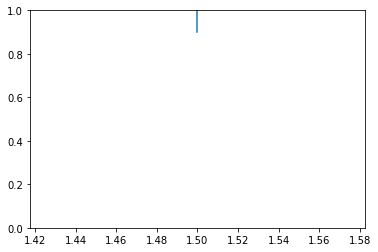

In [30]:
plt.axvline(1.5, 1.025, .9)

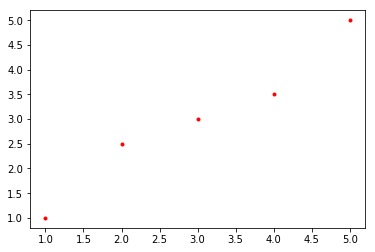

In [3]:
plt.plot([1, 2, 3, 4, 5], [1, 2.5, 3, 3.5, 5], 'r.');

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
b = load_boston()

In [4]:
b.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
b['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston=pd.DataFrame(b['data'], columns=b['feature_names'])
boston['MEDV'] = b['target']

In [7]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


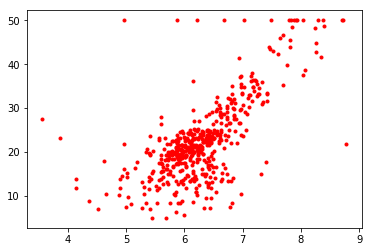

In [11]:
plt.plot(boston['RM'],boston['MEDV'], 'r.');

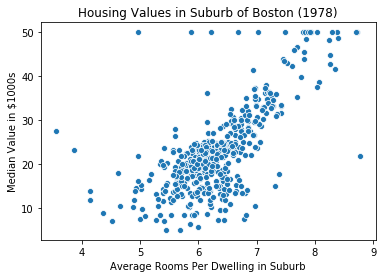

In [28]:
plt.title("Housing Values in Suburb of Boston (1978)")
sns.scatterplot(boston['RM'], boston['MEDV'])
plt.ylabel("Median Value in $1000s")
plt.xlabel("Average Rooms Per Dwelling in Suburb")
plt.savefig('bostonrm.png')

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
sns.set(font_scale=2)
sns.set_style("white")

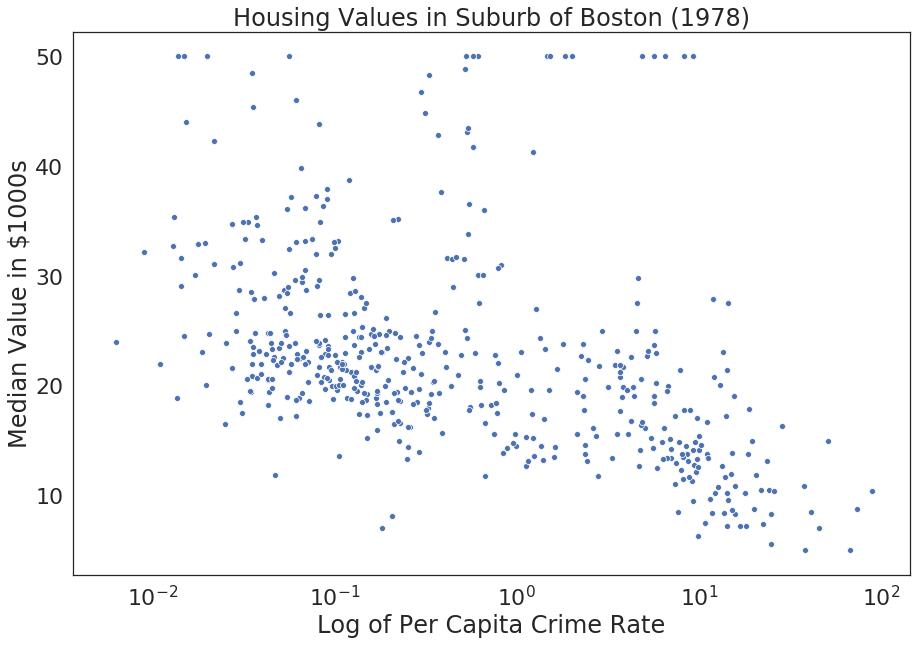

In [35]:
plt.figure(figsize=(15,10))
plt.title("Housing Values in Suburb of Boston (1978)")
sns.scatterplot(boston['CRIM'], boston['MEDV'])
plt.xscale("log")
plt.ylabel("Median Value in $1000s")
plt.xlabel("Log of Per Capita Crime Rate")
plt.savefig('bostoncrim.png')

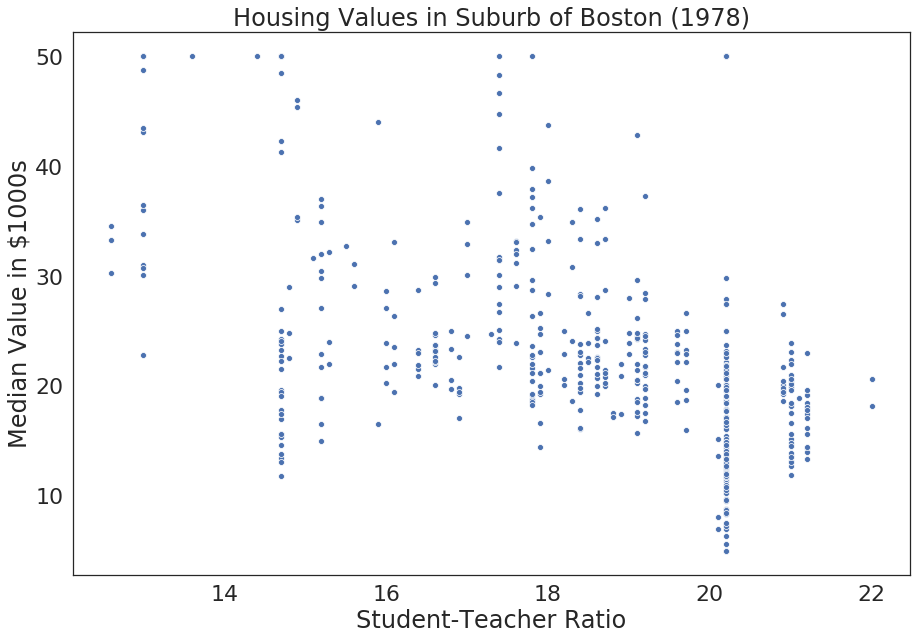

In [28]:
plt.figure(figsize=(15,10))
plt.title("Housing Values in Suburb of Boston (1978)")
sns.scatterplot(boston['PTRATIO'], boston['MEDV'])
plt.ylabel("Median Value in $1000s")
plt.xlabel("Student-Teacher Ratio")
plt.savefig('bostonptratio.png')

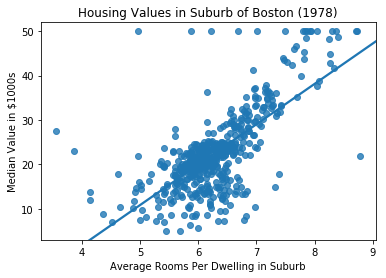

In [37]:
plt.title("Housing Values in Suburb of Boston (1978)")
sns.regplot(boston['RM'], boston['MEDV'],ci=None)
plt.ylabel("Median Value in $1000s")
plt.xlabel("Average Rooms Per Dwelling in Suburb")
plt.ylim(3, 52)
plt.savefig('bostonrmline.png')

In [37]:
boston['RM'].reshape(-1, 1)

AttributeError: 'Series' object has no attribute 'reshape'

In [54]:
import numpy as np
boston['RM'].values.reshape(-1, 1)

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [60]:
model = LinearRegression()
X = boston['RM'].values.reshape(-1, 1)
y = boston['MEDV'].values.reshape(-1, 1)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
#https://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot
def rand_jitter(arr, randomness=.1):
    stdev = randomness*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, verts=verts, hold=hold, **kwargs)

In [13]:
import numpy as np

In [14]:
np.arange(25)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [15]:
rand_jitter(np.arange(10))

array([0.58781995, 1.13211752, 2.06591092, 2.71295282, 4.92790236,
       3.37710089, 6.5905659 , 6.800693  , 8.18214409, 9.31948425])

In [16]:
lr1x = np.arange(25)
lr1y = rand_jitter(np.arange(25))

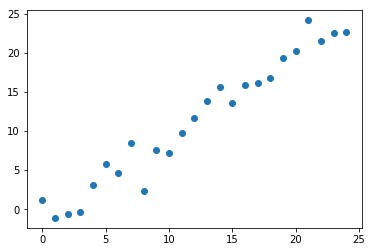

In [17]:
plt.scatter(lr1x, lr1y);
plt.savefig('lr1.png')

In [18]:
import seaborn as sns

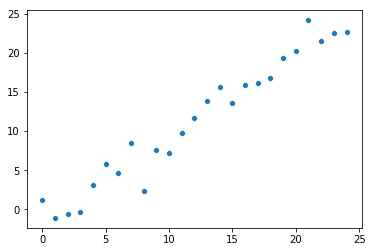

In [20]:
sns.scatterplot(lr1x, lr1y);
plt.savefig('lr1.png')

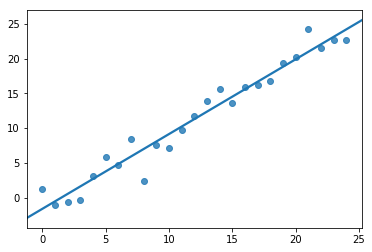

In [22]:
sns.regplot(lr1x, lr1y, ci=None);
plt.savefig('lr1line.png')

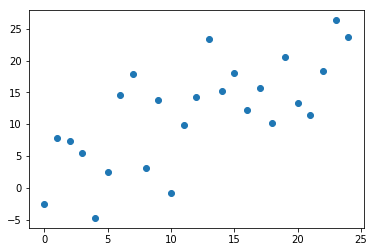

In [75]:
plt.scatter(np.arange(25), rand_jitter(np.arange(25), randomness=.25));
plt.savefig('lr2.png')

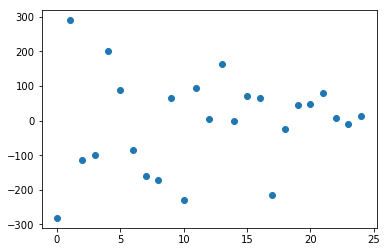

In [76]:
plt.scatter(np.arange(25), rand_jitter(np.arange(25), randomness=5));
plt.savefig('badfit.png')